# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('../'))
from counterfactual_tpp import sample_counterfactual, superposition, combine, check_monotonicity
from sampling_utils import homogenous_poisson, thinning, thinning_T

In [4]:
def normal_1(x):  # original intensity
    mean = 5
    sd = 10
    return 50 * (1/(sd * (np.sqrt(2*np.pi)))) * np.exp(-0.5*((x-mean)/sd)**2)

def  normal_2(x):  # intervened intensity
    mean = 5
    sd = 2
    return 50 * (1/(sd * (np.sqrt(2*np.pi)))) * np.exp(-0.5*((x-mean)/sd)**2)

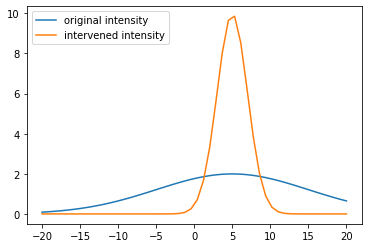

In [5]:
# plotting the intensities first
x = np.linspace(-20, 20)
plt.plot(x, normal_1(x), label='original intensity')
plt.plot(x, normal_2(x), label='intervened intensity')
plt.legend()
# plt.savefig('../intensities.png', format = 'png', dpi = 900)
plt.show()

# Sampling From Lambda_max

In [8]:
# sampling from lambda_max, statring with zero
lambda_max =10
T = 11
sample, indicators = thinning_T(0, intensity=normal_1, lambda_max=lambda_max, max_number_of_samples=100, T=T)
accepted = [sample[i] for i in range(len(sample)) if indicators[i] == True]
lambdas = normal_1(np.asarray(sample))
sample = np.asarray(sample)
print('All events:\n', sample)
print('{} out of {} samples accepted.'.format(len(accepted), len(sample)))
print('accepted events:\n', accepted)
print('indicators:\n', indicators)

All events:
 [ 0.01127672  0.01155511  0.09913544  0.19503842  0.34668231  0.49400614
  0.50350369  0.50466579  0.66005606  0.72932523  0.76242162  0.88742462
  1.00445218  1.01790505  1.11296839  1.11525841  1.27244732  1.59364182
  1.6729763   1.75142131  1.89579258  1.96603118  1.98045964  2.48900852
  2.62422309  2.63468846  2.95100053  3.36996234  3.48297143  3.53093661
  3.59135862  3.61717244  3.61960982  3.66896724  3.70429858  3.73070898
  3.79195129  3.87377166  4.108771    4.16737386  4.22813386  4.35285675
  4.61673265  4.67304241  4.72002608  4.82115987  4.92325618  4.92450892
  4.93366598  4.96316574  5.18079247  5.18513674  5.51655988  5.58071245
  5.76844864  5.83845276  5.86223288  5.90928299  5.96871263  5.98025948
  6.10284564  6.25803618  6.31110452  6.3908748   6.42195699  6.68501088
  6.76254124  6.89020347  6.89484121  7.14180676  7.19775963  7.42825295
  7.72736458  7.74638329  8.09062131  8.18786517  8.29812913  8.34179058
  8.50234366  8.51493758  8.57215043  

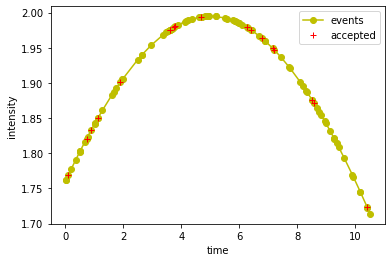

In [9]:
plt.plot(sample,lambdas, '-oy', label = 'events')
plt.plot(sample[indicators],lambdas[indicators], 'r+', label = 'accepted')
plt.xlabel('time')
plt.ylabel('intensity')
plt.legend()
# plt.savefig('../sample_max.png', format = 'png', dpi = 900)

In [10]:
counterfactuals, counterfactual_indicators = sample_counterfactual(sample, lambdas, lambda_max, indicators, normal_2)
print('counterfactuals:\n', counterfactuals)
print(len(counterfactuals))

counterfactuals:
 [0.729325227603572, 0.8874246207832781, 1.1152584099945841, 1.8957925792024248, 3.3699623403270413, 3.4829714323384433, 3.5309366101898707, 3.5913586210756487, 3.6171724423456153, 3.619609820790137, 3.668967238494314, 3.704298575689073, 3.7307089839081518, 3.7919512919836826, 3.8737716608602573, 4.108770998992853, 4.167373857651306, 4.2281338642157955, 4.352856748533079, 4.616732653529503, 4.673042409666158, 4.720026076819092, 4.821159867454947, 4.923256175766287, 4.924508923193944, 4.933665979018572, 4.963165736026123, 5.180792466821117, 5.185136735274951, 5.516559878304468, 5.580712446809393, 5.768448639140545, 5.838452759371017, 5.862232883558618, 5.909282988138262, 5.968712630202704, 5.980259480252422, 6.102845637967141, 6.258036180294402, 6.311104516985245, 6.390874803210489, 6.421956991123087, 6.685010879095845, 6.762541244673207, 6.894841212606167, 7.141806757856042, 7.1977596288666685, 8.514937582780979, 8.572150433124452]
49


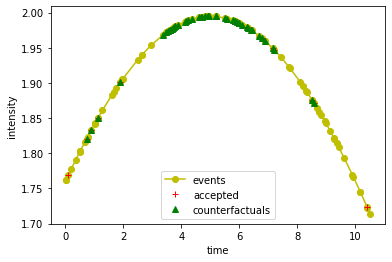

In [11]:
plt.plot(sample,lambdas, '-oy', label = 'events')
plt.plot(sample[indicators],lambdas[indicators], 'r+', label = 'accepted')
plt.plot(counterfactuals, lambdas[counterfactual_indicators], 'g^', label = 'counterfactuals')
plt.xlabel('time')
plt.ylabel('intensity')
plt.legend()
# plt.savefig('../counter_max.png', format = 'png', dpi = 900)

As we can see, all of the accepted events that have higher intensity, are also accepted in the counter factual.

In [12]:
check_monotonicity(sample, counterfactuals, normal_1, normal_2, accepted) 

MONOTONIC


In [ ]:
n_realizations = 10
n_counter = 10
for realization in range(n_realizations):
    sample, indicators = thinning_T(0, intensity=normal_1, lambda_max=lambda_max,      max_number_of_samples=100, T=T)
    N = np.array([sum(indicators[0:i]) for i in range(len(sample))])
    lambdas = normal_1(np.asarray(sample))
    sample = np.asarray(sample)
    for counter in range(n_counter):
        counterfactuals, counterfactual_indicators = sample_counterfactual(sample, lambdas, lambda_max, indicators, normal_2)
        M = np.array([sum(counterfactual_indicators[0:i]) for i in range(len(sample))])


In [93]:
N = np.array([sum(indicators[0:i]) for i in range(len(sample))])
M = np.array([sum(counterfactual_indicators[0:i]) for i in range(len(sample))])


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         2,   2,   2,   2,   2,   2,   2,   6,   6,   6,   6,   6,   6,
         9,  12,  15,  18,  21,  24,  27,  30,  33,  36,  39,  42,  45,
        48,  68,  72,  76,  80,  84, 110, 115, 144, 150, 156, 162, 168,
       174, 180, 186, 192, 198, 204, 210, 252, 296, 304, 312, 320, 369,
       378, 387, 396, 405, 414, 470, 528, 528, 528, 528, 528, 528, 528,
       528, 528, 528, 528, 528, 528, 528, 528, 528, 528, 528, 528, 528,
       588, 588, 588, 588, 588, 637, 637, 637, 637])

# Real-World Scenario

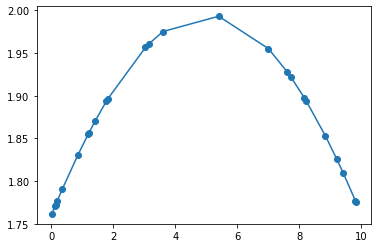

In [21]:
h_observed, lambda_observed, h_rejected, lambda_bar_rejected = superposition(lambda_max, normal_1, 5, 25)
plt.plot(h_observed, lambda_observed, '-o')
# plt.savefig('../observed.png', format = 'png', dpi = 900)

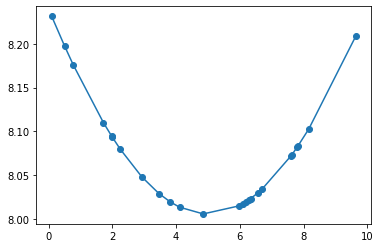

In [22]:
plt.plot(h_rejected, lambda_bar_rejected, '-o')
# plt.savefig('../superposition.png', format = 'png', dpi = 900)

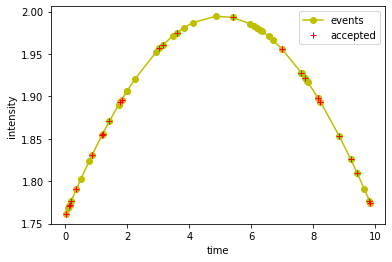

In [23]:
sample_rc, lambdas_rc, indicators_rc = combine(h_observed, lambda_observed, h_rejected, normal_1)
plt.plot(sample_rc,lambdas_rc, '-oy', label = 'events')
plt.plot(sample_rc[indicators_rc],lambdas_rc[indicators_rc], 'r+', label = 'accepted')
plt.xlabel('time')
plt.ylabel('intensity')
plt.legend()
# plt.savefig('../combine.png', format = 'png', dpi = 900)

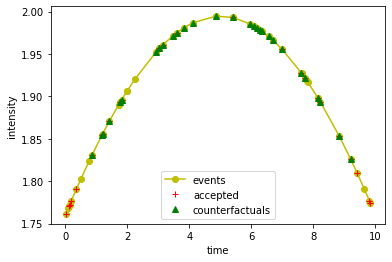

In [24]:
counterfactuals_rc, counterfactual_indicators_rc = sample_counterfactual(sample_rc, lambdas_rc, lambda_max, indicators_rc, normal_2)
plt.plot(sample_rc,lambdas_rc, '-oy', label = 'events')
plt.plot(sample_rc[indicators_rc],lambdas_rc[indicators_rc], 'r+', label = 'accepted')
plt.plot(counterfactuals_rc, lambdas_rc[counterfactual_indicators_rc], 'g^', label = 'counterfactuals')
# plt.plot(x, normal_1(x), label='original intensity')
# plt.plot(x, normal_2(x), label='intervened intensity')
plt.xlabel('time')
plt.ylabel('intensity')
plt.legend()
# plt.savefig('../counter_real.png', format = 'png', dpi = 900)

In [25]:
check_monotonicity(sample_rc, counterfactuals_rc, normal_1, normal_2, h_observed)

MONOTONIC
